# Bing News numbers

In [33]:
import pandas as pd
import json
import re
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [34]:
df = pd.read_csv("events/events_dataframe_en.csv", converters={'redirects': pd.eval, 'list_views_7_days':pd.eval})
df = df[(df["views_7_sum"] != 0) & (df.cat != "")]

In [35]:
len(df["pagetitle"].unique())

5182

In [104]:
with open('scraping/results/en_bingnews_1.json') as json_data:
    data1 = json.load(json_data)
with open('scraping/results/en_bingnews_2.json') as json_data:
    data2 = json.load(json_data)
data_old = {**data1, **data2}
len(data)

5182

In [103]:
with open('scraping/results/en_bingnews_1_new.json') as json_data:
    data1 = json.load(json_data)
with open('scraping/results/en_bingnews_2_new.json') as json_data:
    data2 = json.load(json_data)
data = {**data1, **data2}
len(data)

5182

In [38]:
len(data1)

2496

In [39]:
def get_hits_from_json(json_data, serp='bing_news'):
    bing_news_hits = []
    i = 0 
    for title, crawl_res in json_data.items():
        # get result string and clean
        if '1' not in crawl_res:
            print(f'Error in results for {title}: |{crawl_res}|')
            continue
    
        res_string = crawl_res['1']['num_results']
        num_string = re.sub('[^0-9]', '', res_string)
        
        if len(num_string) == 0:
            print(f'Error when parsing hits for {title}: |{res_string}|')
            continue

        bing_news_hits.append([title, int(num_string)])
        
        # debug output
        if i%500 == 0:
            print(title, res_string, num_string)
        i+=1
    return pd.DataFrame(bing_news_hits, columns=['pagetitle', f'{serp}_hits'])

In [40]:
news_hits_old = get_hits_from_json(data_old, 'bing_news_old')
news_hits_old.head()

2023 South Sudanese general election 444,000 results 444000
Error when parsing hits for 16th OTO Awards: ||
2016 Acht van Westerveld 11,400 results 11400
Error in results for Athletics at the 2016 Summer Olympics – Women's shot put: |{}|
2018 Oldham Metropolitan Borough Council election 53 results 53
2018 Guamanian general election 1,380,000 results 1380000
2019 Bulacan local elections 2,000,000 results 2000000
2019 New Jersey elections 3 results 3
2020 Sydney SuperSprint 11 results 11
2020 Liberian constitutional referendum 49,600 results 49600


,pagetitle,bing_news_old_hits
0,2023 South Sudanese general election,444000
1,2015 Swedish Open,210000
2,2015 Ji'an bus accident,50200
3,2015 Chama Cha Mapinduzi presidential primaries,21
4,Aleppo offensive (July 2015),34900


In [41]:
news_hits = get_hits_from_json(data)
#news_hits.head()

2023 South Sudanese general election 444,000 results 444000
2016 Mexico City ePrix 393,000 results 393000
Equestrian at the 2016 Summer Olympics – Team jumping 16,300 results 16300
UFC on Fox: Shevchenko vs. Peña 38 results 38
2017 Barcelona attacks 33,300 results 33300
2018 Dutch Intelligence and Security Services Act referendum 17,400 results 17400
2018 Toronto municipal election 58,000 results 58000
2019 Food City 500 222,000 results 222000
2019 Kashmir earthquake 82 results 82
2020 Idaho Republican presidential primary 15 results 15
Error when parsing hits for 2020 Chuhuiv An-26 crash: ||
2020 United States presidential election in South Carolina 10 results 10


In [102]:
len(news_hits)

5181

In [42]:
en_merged = news_hits.merge(news_hits_old, on='pagetitle', copy=False)

In [26]:
en_merged[(en_merged.bing_news_hits > 0) & (en_merged.bing_news_old_hits > 0)].corr('spearman')

,bing_news_hits,bing_news_old_hits
bing_news_hits,1.000000,0.988665
bing_news_old_hits,0.988665,1.000000


In [43]:
# remove recurring events
df = df[~df.pagetitle.duplicated(keep=False)]
df = df.merge(news_hits, on='pagetitle', copy=False, how='left')

In [92]:
not_found = df[pd.isna(df.bing_news_hits)].copy()
not_found

,pagetitle,event_date,economic_region,continent,cat,categories,views_7_sum,views_before_mean,views_before_sum,views_before_max,...,views_before_median,views_before_increase,list_views_7_days,diff_days,year,planed,surprising,factor,views_7_days_mean,bing_news_hits
4777,2020 Chuhuiv An-26 crash,2020-09-25T00:00:00Z,Global South,Europe,disaster,"['Category:2020 in Ukraine', 'Category:Acciden...",12525,0.0,0,0,...,0.0,0,"[1812, 4969, 2761, 1215, 718, 499, 379]",0,2020,not_planed,not_surprising,NaN,1764.714286,NaN


In [94]:
df = df[~pd.isna(df.bing_news_hits)]
df.count()

pagetitle                5171
event_date               5171
economic_region          5171
continent                5171
cat                      5023
categories               5171
views_7_sum              5171
views_before_mean        5171
views_before_sum         5171
views_before_max         5171
views_before_min         5171
views_before_median      5171
views_before_increase    5171
list_views_7_days        5171
diff_days                5171
year                     5171
planed                   5171
surprising               5171
factor                   4569
views_7_days_mean        5171
bing_news_hits           5171
dtype: int64

In [107]:
df[['views_7_sum', 'bing_news_hits']].corr('spearman')

,views_7_sum,bing_news_hits
views_7_sum,1.000000,-0.003885
bing_news_hits,-0.003885,1.000000


In [96]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [ ]:
# does this correlate with general google trends?

In [50]:
df[df.views_7_days_mean > 0]

,pagetitle,event_date,economic_region,continent,cat,categories,views_7_sum,views_before_mean,views_before_sum,views_before_max,...,views_before_median,views_before_increase,list_views_7_days,diff_days,year,planed,surprising,factor,views_7_days_mean,bing_news_hits
0,2015 Swedish Open,2015-07-01T00:00:00Z,Global North,Europe,sports,"['Category:2015 ATP World Tour', 'Category:201...",2714,0.000000,0,0,...,0.0,0,"[304, 296, 356, 356, 414, 449, 539]",-11,2015,planed,not_surprising,before,387.714286,210000.0
1,2015 Ji'an bus accident,2015-07-01T00:00:00Z,Global South,Asia,disaster,"['Category:2015 disasters in China', 'Category...",1161,0.000000,0,0,...,0.0,0,"[60, 507, 103, 148, 143, 200]",1,2015,not_planed,surprising,surprising,193.500000,50200.0
3,Aleppo offensive (July 2015),2015-07-02T00:00:00Z,Global South,Asia,disaster,"['Category:Aleppo in the Syrian civil war', 'C...",2372,0.000000,0,0,...,0.0,0,"[777, 1595]",5,2015,not_planed,not_surprising,after,1186.000000,34900.0
4,The Beast in the East,2015-07-04T00:00:00Z,Global North,Asia,sports,"['Category:2015 WWE Network events', 'Category...",134916,12961.000000,38883,16557,...,12533.0,6764,"[57904, 26357, 17092, 12719, 7893, 6825, 5997]",-9,2015,planed,not_surprising,before,19255.285714,310000.0
6,2015 British Grand Prix,2015-07-05T00:00:00Z,Global North,Europe,sports,"['Category:2015 Formula One races', 'Category:...",16567,748.750000,2995,2021,...,373.5,1785,"[7584, 3971, 1728, 1030, 904, 829, 521]",-134,2015,planed,not_surprising,before,2366.714286,31600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,2020 Aden airport attack,2020-12-30T00:00:00Z,Global South,Asia,disaster,"['Category:2020 in Yemen', 'Category:21st-cent...",84155,0.000000,0,0,...,0.0,0,"[981, 129, 42, 18, 27, 20, 9]",0,2020,not_planed,not_surprising,NaN,175.142857,54.0
5168,Killing of Dolal Idd,2020-12-30T00:00:00Z,Global North,North America,disaster,['Category:2020 controversies in the United St...,21836,0.000000,0,0,...,0.0,0,"[3503, 3579, 4468, 5516, 4546]",2,2020,not_planed,not_surprising,after,4322.400000,8.0
5169,2020 Gjerdrum landslide,2020-12-30T00:00:00Z,Global North,Europe,disaster,"['Category:2020 disasters in Europe', 'Categor...",38328,0.000000,0,0,...,0.0,0,"[2015, 3653, 7684, 24976]",3,2020,not_planed,not_surprising,after,9582.000000,3.0
5170,Rowing at the 2020 Summer Olympics,2021-07-23T00:00:00Z,Global North,Asia,sports,"['Category:2020 Summer Olympics events', 'Cate...",226071,3650.142857,25551,11769,...,2593.0,10612,"[46531, 28742, 27107, 16294, 22502, 51901, 32991]",-2874,2021,planed,not_surprising,before,32295.428571,274.0


In [50]:
import numpy as np
model = smf.ols(formula='np.log1p(views_7_days_mean) ~ C(year)*np.log1p(bing_news_hits)', data=df.dropna()).fit()    
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     np.log1p(views_7_days_mean)   R-squared:                       0.064
Model:                                     OLS   Adj. R-squared:                  0.061
Method:                          Least Squares   F-statistic:                     23.23
Date:                         Wed, 05 Jan 2022   Prob (F-statistic):           8.72e-55
Time:                                 15:33:03   Log-Likelihood:                -11741.
No. Observations:                         4436   AIC:                         2.351e+04
Df Residuals:                             4422   BIC:                         2.360e+04
Df Model:                                   13                                         
Covariance Type:                     nonrobust                                         
============================================================================================================
                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
Intercept                                    4.8713      0.408     11.947      0.000       4.072       5.671
C(year)[T.2016]                             -0.7334      0.459     -1.597      0.110      -1.634       0.167
C(year)[T.2017]                             -0.3251      0.480     -0.678      0.498      -1.265       0.615
C(year)[T.2018]                             -0.7139      0.470     -1.518      0.129      -1.636       0.208
C(year)[T.2019]                              0.9262      0.470      1.969      0.049       0.004       1.849
C(year)[T.2020]                              0.3851      0.460      0.837      0.403      -0.517       1.287
C(year)[T.2021]                             -6.4824     20.056     -0.323      0.747     -45.801      32.837
np.log1p(bing_news_hits)                    -0.0965      0.048     -2.024      0.043      -0.190      -0.003
C(year)[T.2016]:np.log1p(bing_news_hits)     0.1414      0.055      2.593      0.010       0.034       0.248
C(year)[T.2017]:np.log1p(bing_news_hits)     0.0626      0.057      1.105      0.269      -0.049       0.174
C(year)[T.2018]:np.log1p(bing_news_hits)     0.1150      0.055      2.103      0.036       0.008       0.222
C(year)[T.2019]:np.log1p(bing_news_hits)     0.1514      0.054      2.804      0.005       0.046       0.257
C(year)[T.2020]:np.log1p(bing_news_hits)     0.1933      0.055      3.500      0.000       0.085       0.302
C(year)[T.2021]:np.log1p(bing_news_hits)     2.2347      3.980      0.562      0.574      -5.568      10.037
==============================================================================
Omnibus:                      872.763   Durbin-Watson:                   1.557
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.998
Skew:                           0.034   Prob(JB):                     6.06e-39
Kurtosis:                       2.027   Cond. No.                     3.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
import numpy as np
df = df
d = {'views_before_sum': df['views_before_sum'].apply(lambda x:np.log(x+1)),
     'views_before_mean': df['views_before_mean'].apply(lambda x:np.log(x+1)),
     'views_before_median': df['views_before_median'].apply(lambda x:np.log(x+1)),
     'views_before_max': df['views_before_max'].apply(lambda x:np.log(x+1)),
     'views_before_min': df['views_before_min'].apply(lambda x:np.log(x+1)),
     'views_before_increase': df['views_before_increase'].apply(lambda x:np.log(x+abs(min(df.views_before_increase))+1)),
     'views_7_sum': df['views_7_sum'].apply(lambda x:np.log(x+1)),
     'diff_days':df['diff_days'].apply(lambda x:np.log(x+abs(min(df.diff_days))+1)),
     'economic_region':df['economic_region'],
     'cat': df['cat'],
     'planed':df['planed'],
     'surprising': df['surprising'],
     'factor':df['factor'],
     'year':df['year'],
     'bing_news': np.log1p(df['bing_news_hits'])
    }
data = pd.DataFrame(data=d)
data['bing_attention'] = data.bing_news.apply(lambda views: 'low' if views < 6 else 'high')

In [87]:
data.bing_attention.value_counts()

high    2640
low     2532
Name: bing_attention, dtype: int64

In [99]:
model = smf.ols(formula='views_7_sum ~ bing_attention * economic_region', data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            views_7_sum   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     6.528
Date:                Wed, 05 Jan 2022   Prob (F-statistic):           0.000210
Time:                        17:23:29   Log-Likelihood:                -11432.
No. Observations:                5172   AIC:                         2.287e+04
Df Residuals:                    5168   BIC:                         2.290e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                 8.9100      0.052    171.855      0.000       8.808       9.012
bing_attention[T.low]                                    -0.2928      0.072     -4.073      0.000      -0.434      -0.152
economic_region[T.Global South]                          -0.1320      0.093     -1.425      0.154      -0.314       0.050
bing_attention[T.low]:economic_region[T.Global South]     0.4445      0.140      3.171      0.002       0.170       0.719
==============================================================================
Omnibus:                        3.048   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                2.857
Skew:                           0.005   Prob(JB):                        0.240
Kurtosis:                       2.885   Cond. No.                         6.29
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

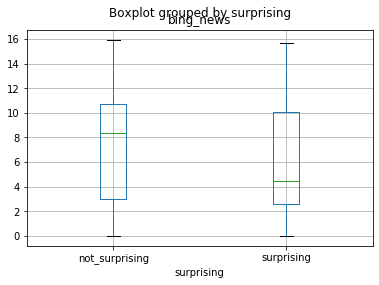

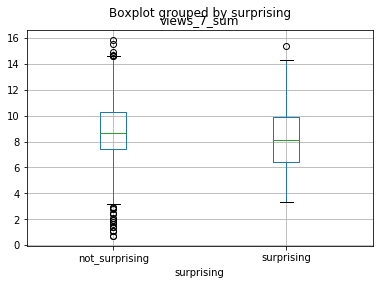

In [68]:
data.boxplot(column='bing_news', by='surprising')
data.boxplot(column='views_7_sum', by='surprising')

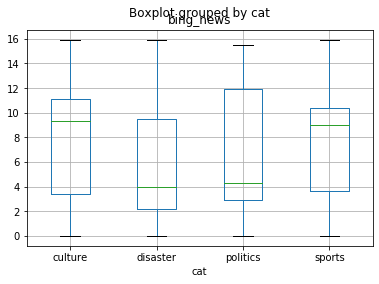

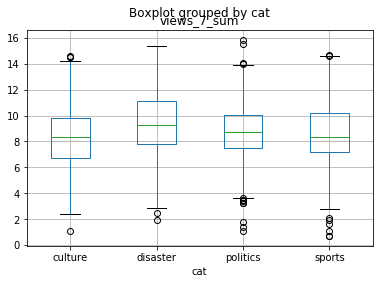

In [69]:
data.boxplot(column='bing_news', by='cat')
data.boxplot(column='views_7_sum', by='cat')

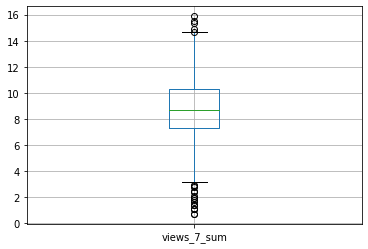

In [61]:
data.boxplot(column='views_7_sum')

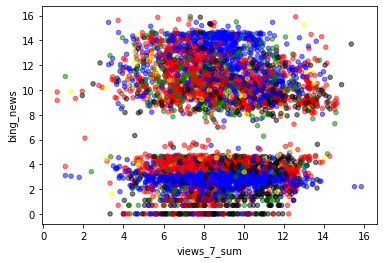

In [99]:
col = data.cat.map({'politics':'b', 'sports':'r', 'disaster': 'black', 'culture': 'g', np.nan:'yellow'})
data.plot.scatter(x='views_7_sum', y='bing_news', c=col, alpha=0.5)

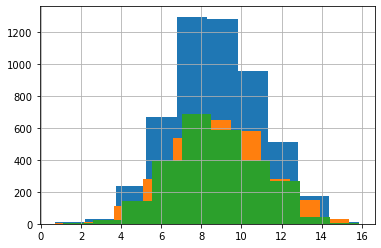

In [92]:
data.views_7_sum.hist()
data[data.bing_attention == 'high'].views_7_sum.hist()
data[data.bing_attention == 'low'].views_7_sum.hist()

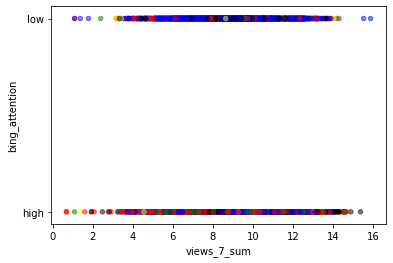

In [88]:
col = data.cat.map({'politics':'b', 'sports':'r', 'disaster': 'black', 'culture': 'g', np.nan:'yellow'})
data.plot.scatter(x='views_7_sum', y='bing_attention', c=col, alpha=0.5)

In [78]:
data.bing_news.quantile(.33)

3.4965075614664802

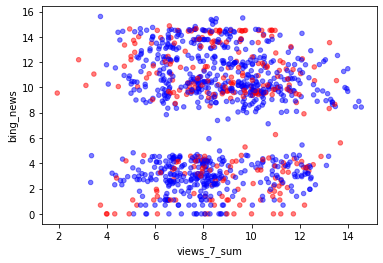

In [106]:
col = data[data.year==2019].economic_region.map({'Global South':'r', 'Global North':'b'})
data[data.year==2019].plot.scatter(x='views_7_sum', y='bing_news', c=col, alpha=0.5)

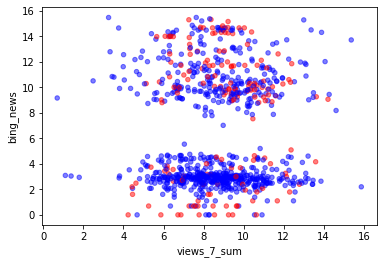

In [105]:
col = data[data.year==2020].economic_region.map({'Global South':'r', 'Global North':'b'})
data[data.year==2020].plot.scatter(x='views_7_sum', y='bing_news', c=col, alpha=0.5)

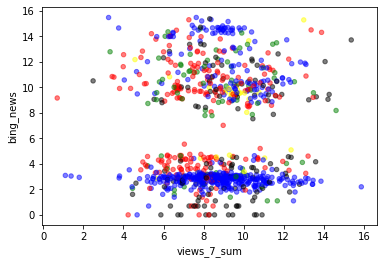

In [103]:
col = data[data.year==2020].cat.map({'politics':'b', 'sports':'r', 'disaster': 'black', 'culture': 'g', np.nan:'yellow'})
data[data.year==2020].plot.scatter(x='views_7_sum', y='bing_news', c=col, alpha=0.5)

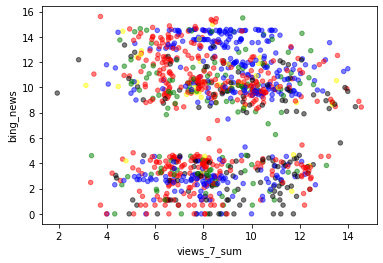

In [104]:
col = data[data.year==2019].cat.map({'politics':'b', 'sports':'r', 'disaster': 'black', 'culture': 'g', np.nan:'yellow'})
data[data.year==2019].plot.scatter(x='views_7_sum', y='bing_news', c=col, alpha=0.5)